In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt 

1080 1920


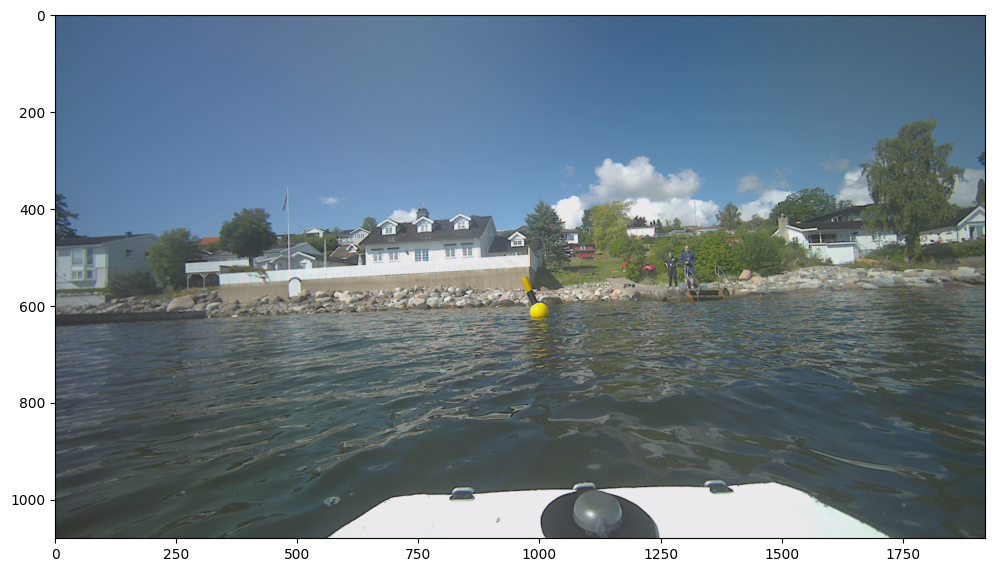

In [3]:
# load image and convert to RGB
img_path = '../data/'
buoy = cv2.cvtColor(cv2.imread(img_path + 'cardinal_buoy.png'), cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 12))
plt.imshow(buoy)
width, height, _ = buoy.shape
print(width, height)

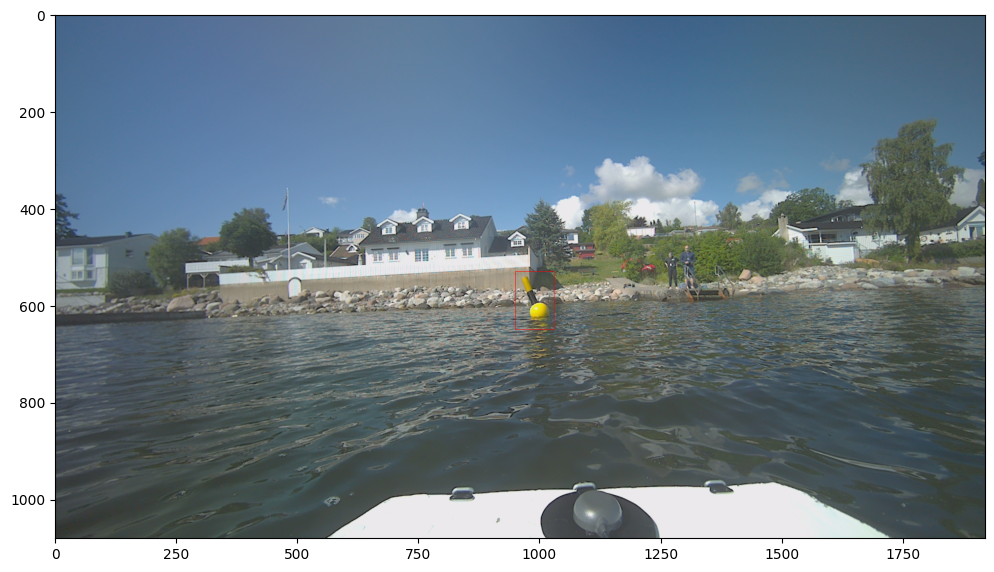

In [ ]:
box_vertices = np.array([[1030, 650], [1030, 530], [950, 530], [950, 650]])
cv2.polylines(buoy, [box_vertices], True, (255, 0, 0), 1)
plt.figure(figsize=(12, 12))
plt.imshow(buoy)

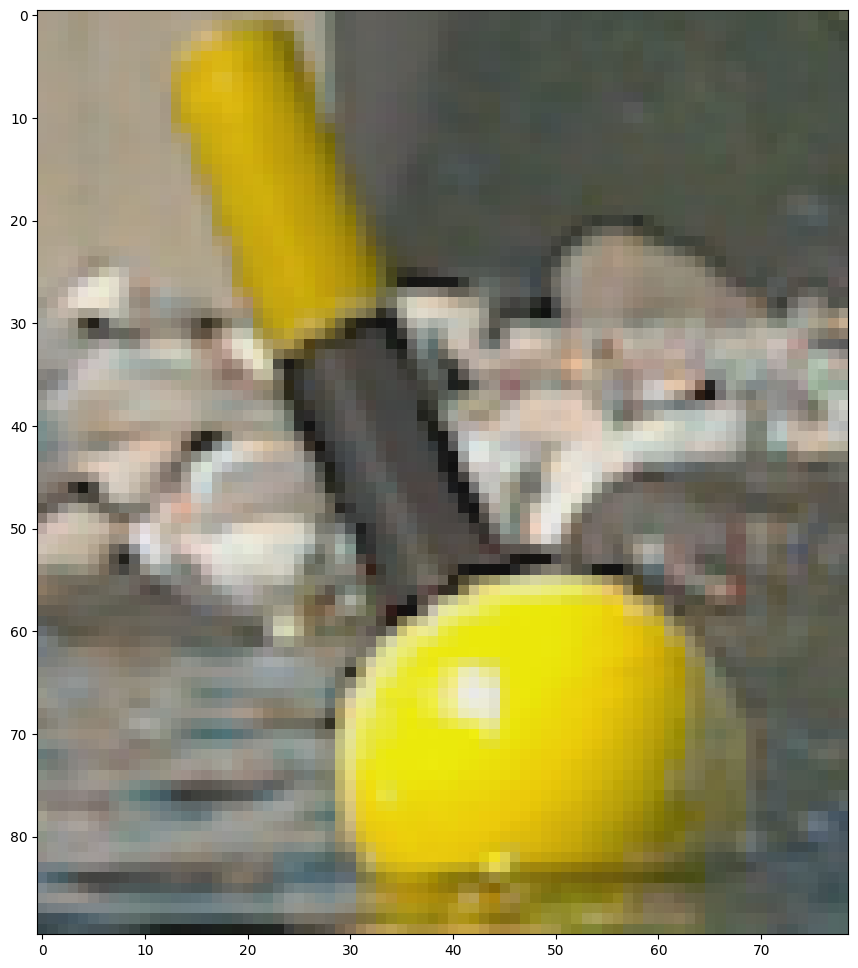

In [ ]:
buoy_isolated = buoy[530+10:650-20, 950+1:1030]
plt.figure(figsize=(12, 12))
plt.imshow(buoy_isolated)

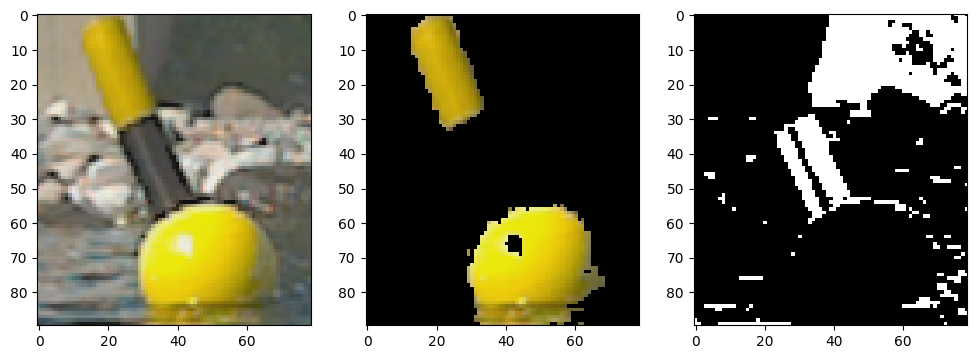

In [ ]:
#convert to HSV
buoy_hsv = cv2.cvtColor(buoy_isolated, cv2.COLOR_RGB2HSV)

# define range of yellow color in HSV
lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([30, 255, 255])

# define range of gray/black color in HSV
lower_black = np.array([0, 0, 0])
upper_black = np.array([255, 255, 85])

# Threshold the HSV image to get only yellow colors
mask_yellow = cv2.inRange(buoy_hsv, lower_yellow, upper_yellow)
mask_black = cv2.inRange(buoy_hsv, lower_black, upper_black)

# Bitwise-AND mask and original image
res_yellow = cv2.bitwise_and(buoy_isolated, buoy_isolated, mask=mask_yellow)
res_black = cv2.bitwise_and(buoy_isolated, buoy_isolated, mask=mask_black)

# color res_black to white
res_black[res_black > 0] = 255

plt.figure(figsize=(12, 12))
plt.subplot(1, 3, 1)
plt.imshow(buoy_isolated)
plt.subplot(1, 3, 2)
plt.imshow(res_yellow)
plt.subplot(1, 3, 3)
plt.imshow(res_black)




2

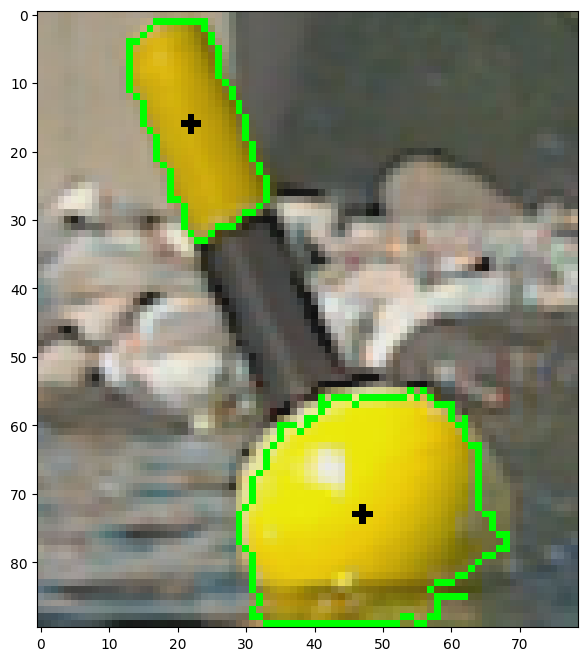

In [ ]:
# get number of yellow blobs above a certain size
contours, hierarchy = cv2.findContours(mask_yellow, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# get the two largest contours
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:2]
# draw contours
cv2.drawContours(buoy_isolated, contours, -1, (0, 255, 0), 1)
# get centroids
centroids = []
for contour in contours:
    M = cv2.moments(contour)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    centroids.append((cx, cy))

# draw centroids
for centroid in centroids:
    cv2.circle(buoy_isolated, centroid, 1, (0, 0, 0), -1)

plt.figure(figsize=(8, 8))
plt.imshow(buoy_isolated)
len(contours)

2

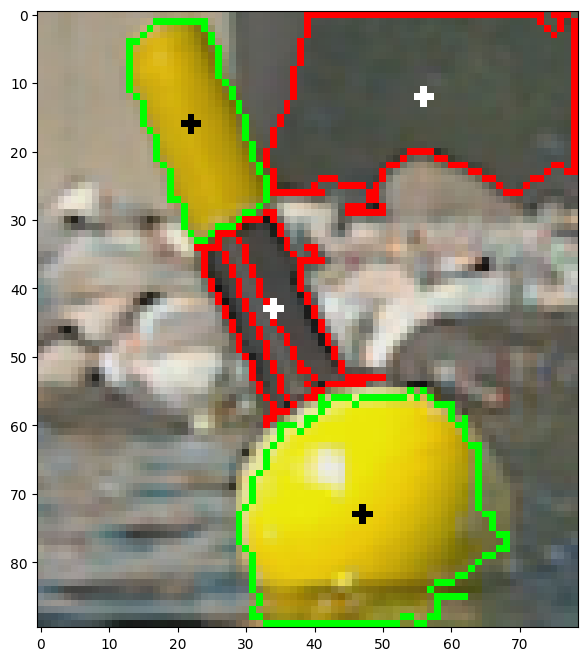

In [ ]:
# get number of yellow blobs above a certain size
contours, hierarchy = cv2.findContours(mask_black, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# get the two largest contours
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:2]
# draw contours
cv2.drawContours(buoy_isolated, contours, -1, (255, 0, 0), 1)
# get centroids
centroids = []
for contour in contours:
    M = cv2.moments(contour)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    centroids.append((cx, cy))

# draw centroids
for centroid in centroids:
    cv2.circle(buoy_isolated, centroid, 1, (255, 255, 255), -1)

plt.figure(figsize=(8, 8))
plt.imshow(buoy_isolated)
len(contours)